<a href="https://colab.research.google.com/github/mayuneko-re/notebook/blob/master/colab/Koval_method_for_miscible_displacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Koval法によるミシブル置換のモデル化

***Koval (1963)*** では、ソルベントを油に圧入してミシブル置換を行う際の挙動について、"K-factor method"と呼ばれるモデル化手法が提案された。この手法はBuckley-Leverett法をアナログとしており、フィンガリングを伴う不安定な置換現象を考慮している。

仮定：
- First contact miscible (FCM)
- 1D linear flow
- No gravity segregation
- Total lack of interaction between solvent and oil (i.e. linear cross relative permeability)
- A single parameter can be used to represent heterogeneity

参考文献

- Koval, 1963, *A Method for Predicting the Performance of Unstable Miscible Displacement in Heterogeneous Media*




## Koval法

Koval法は、Buckley-Leverett理論のアナログとして提案されている。Koval法における **Fractional flow equation**は以下のように表される。

$$
F_s = \frac{1}{1 + \left( \frac{1-S}{S} \right) \left( \frac{1}{H} \right) \left( \frac{1}{E} \right)}
    = \frac{KS}{1+S(K-1)}
$$

ここでは、ソルベントと油の間で相互作用が完全にないとの仮定のもと、相対浸透率は線形で表せる（i.e. $k_o = kS_o$ and $k_s = kS_s$, from ***Scheidegger (1961)***）ことを使用している。また、$K$は **Koval factor** であり、$K = E H$ である。
$E$は **Effective viscosity ratio** であり、次のとおり表される。

$$
E = (0.78 + 0.22 \times V^{1/4})^4
$$

$V$ は実際の油とソルベントの粘性比（$\mu_{oil}/\mu_{sol}$）である。

$H$は **Koval Heterogeity factor** である。$H$は多孔質媒体の不均質性の程度を表し、不均質になれば$H$は大きくなる。均質のときは $H=1$となる。

***Buckley and Leverett (1942)*** および ***Welge (1953)*** から、流出側において下記の関係が成り立つ。

$$
\frac{1}{V_{pi}} = \frac{dF_s}{dS}
$$

前述の式から、

$$
\frac{dF_s}{dS} = \frac{1}{V_{pi}} 
  = \frac{K}{\left[ 1 + (K-1) S \right]^2}
$$

となり、さらに $S$ を消去すると、

$$
V_{pi} = \frac{K}{\left[ K - F_s (K-1) \right]^2}
$$

および

$$
F_s = \frac{K- (K/V_{pi})^{1/2}}{K-1}
$$

の関係が導かれる。これらは、ブレークスルー以後に成り立つ。$F_s=0$ を用いると、ブレークスルー時の圧入量が求められる。

$$
\left( V_{pi} \right)_{bt} = \frac{1}{K}
$$

また、$F_s=1$、すなわち油を完全に置換するときの圧入量は以下のように求められる。

$$
\left( V_{pi} \right)_{comp} = K
$$

油の回収量は、$F_o$ を $V_{pi}$ に対して積分すれば求められる。

$$
N_{pv} = \left( V_{pi} \right)_{bt} 
         + \int_{\left( V_{pi} \right)_{bt}}^{V_{pi}} 
            \left( 1- \left[ \frac{K- \left( K/V_{pi} \right)^{1/2}}{K-1} \right] \right) dV_{pi} \\
    = \frac{2 (KV_{pi})^{1/2} -1 - V_{pi}}{K-1}
$$


## Pythoneで計算してみる

**ライブラリのインポート**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, mark_inset

まずは **Effective viscosity ratio** を計算してみる。油とソルベントの粘性を与える。

In [0]:
mu_oil = 6.5 # Oil viscosity, cp
mu_sol = 0.054 # Solvent viscosity, cp

このとき、Viscosity ratio, Vは、

In [3]:
V = mu_oil/mu_sol # Actual viscosity ratio
V

120.37037037037037

となる。このとき、**Effective viscosity ratio**は、

In [4]:
# Effective viscosity ratio (Eq.13)
def calc_E(V):
    return (0.78 + 0.22*V**0.25)**4

E = calc_E(V)
E

5.181063597124298

となる。VとEの関係を、グラフで示すと以下のようになる。

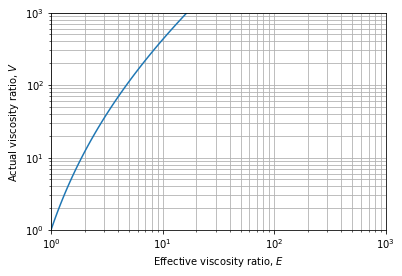

In [5]:
Vl = np.logspace(0,3)

plt.plot(calc_E(Vl), Vl)
plt.xlabel('Effective viscosity ratio, $E$')
plt.ylabel('Actual viscosity ratio, $V$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.ylim(1,1000)
plt.grid(which='both')

次に  **Heterogeneity factor** の計算を行う。
***Koval (1963)*** では、**Heterogeneity factor, H** を変数としてコア流動試験結果にマッチングし、うまく再現できることを示している。また、**H**は、**Dyksra-Parsons coefficient** との相関があるとされており、換算ようのチャートが示されている。ここでは、**H** は適当に与えて、結果をみることにしたい。

In [6]:
H = 1.2 # Koval's Heterogeneity factor 
H

1.2

**H** と **V** から **Koval factor** を計算する。
今、**Koval factor** は、

In [7]:
K = E*H # Koval factor
K

6.217276316549158

となる。

**Koval factor** から、ブレークスルー時の圧入量、および完全に油が掃攻された時の圧入量が求められる。

In [8]:
VpiBT = 1/K # Pore volumes injected at breakthrough (Eq.9)
VpiBT

0.16084213554063828

In [9]:
VpiComp = K # Pore volumes of solvent required to displace completely all the oil (Eq.10)
VpiComp

6.217276316549158

この場合、Vpi = 0.16 PV のとき、ソルベントはブレークスルーし、Vpi = 6.22 PV のとき、完全に油が掃攻されることになる。

ブレークスルーから完全掃攻までの、出口でのソルベントカット **Fs** を **K** を変えてプロットしてみる。

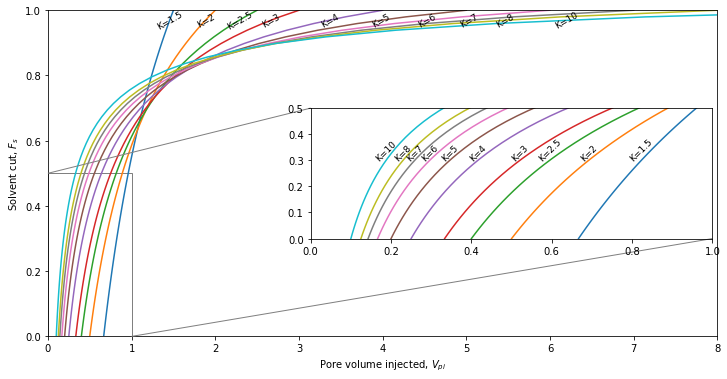

In [10]:
def calc_Vpi(Fs, K):
    Vpi = K / (K-Fs*(K-1))**2
    return Vpi

Fs = np.linspace(0,1)
fig, ax = plt.subplots(figsize=(12,6))
axins = inset_axes(ax, "60%", "40%", loc=7) # zoom-factor, location

for K in (1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 10):
    Vpi = calc_Vpi(Fs, K)
    ax.plot(Vpi, Fs)
    ax.annotate("K="+str(K), xy=(calc_Vpi(0.97,K),0.97), ha='center', va='center', size=9, rotation=30)
    axins.plot(Vpi, Fs)
    axins.annotate("K="+str(K), xy=(calc_Vpi(0.3,K),0.3), ha='center', size=9, rotation=45)

ax.set_xlabel('Pore volume injected, $V_{pi}$')
ax.set_ylabel('Solvent cut, $F_s$')
ax.set_xlim(0,8)
ax.set_ylim(0,1)
axins.set_xlim(0,1)
axins.set_ylim(0,0.5)
_ = mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

**Koval factor** が大きいと、ブレークスルーが早い一方、完全掃攻まで多くの圧入が必要となることが分かる。これは、油とソルベントの粘性比が大きい（つまり、油の粘性が高いか、ソルベントの粘性が低い）、あるいはコアの不均質性が大きく、効率的な置換が行われていない状況を示している。

同様にソルベント圧入量と油の回収量 **Npv** を **K** を変えてプロットしてみる。なお、ブレークスルーまでの油の回収量は、ソルベントの圧入量と同じである。

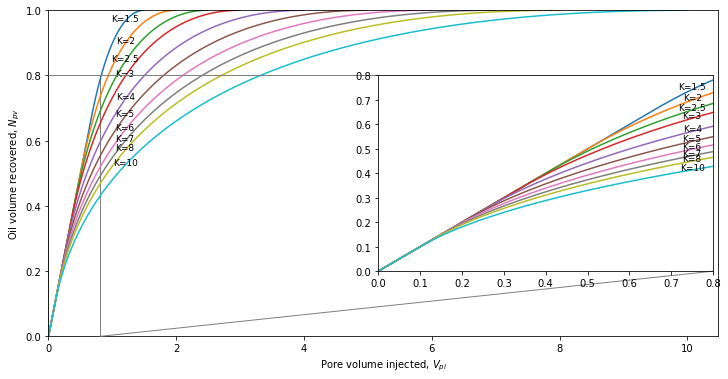

In [11]:
def calc_Npv(Vpi, K):
    Npv = (2 * np.sqrt(K*Vpi) -1 - Vpi) / (K-1)
    return Npv

fig, ax = plt.subplots(figsize=(12,6))
axins = inset_axes(ax, "50%", "60%", loc=7) # zoom-factor, location

for K in (1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 10):
    Vpi = np.arange(1/K,K,0.02)
    Npv = calc_Npv(Vpi,K)
    ax.plot([0,*Vpi], [0,*Npv])
    ax.annotate("K="+str(K), xy=(1.2,calc_Npv(1.2,K)), ha='center', size=9)
    axins.plot([0,*Vpi], [0,*Npv])
    axins.annotate("K="+str(K), xy=(0.75,calc_Npv(0.75,K)), ha='center',size=9)

ax.set_xlabel('Pore volume injected, $V_{pi}$')
ax.set_ylabel('Oil volume recovered, $N_{pv}$')
ax.set_xlim(0,)
ax.set_ylim(0,1)
axins.set_xlim(0,0.8)
axins.set_ylim(0,0.8)
_ = mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

**Fs** と同様に、**Koval factor** の大小によって、ブレークスルー後の挙動が変わっていることが分かる。**Koval factor** が大きいと、ブレークスルーが早い一方、完全掃攻まで多くのソルベントの圧入が必要となっている。

*End of Notebook...*